##### Census Income
##### Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Census%20Income/Census%20Income.csv



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('census.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(32560, 15)

In [5]:
print("Rows =",df.shape[0])
print("Columns =",df.shape[1])

Rows = 32560
Columns = 15


In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

##### Rows = 32560
###### Columns = 15

# Statistical Analysis

In [7]:
print(df.duplicated().sum())

24


##### 24 duplicate entries present.

In [8]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [9]:
df=df.replace(' ?',np.nan)

In [10]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

#### " ?" in dataset replaced with NaN. Now dataset is more reliable. 

In [11]:
df.isin([' ','NA','-']).sum().any()

np.False_

#### Now only NaN present as missing values in df.

In [12]:
df.drop_duplicates(keep='last',inplace=True)

In [13]:
df.shape

(32536, 15)

<Axes: >

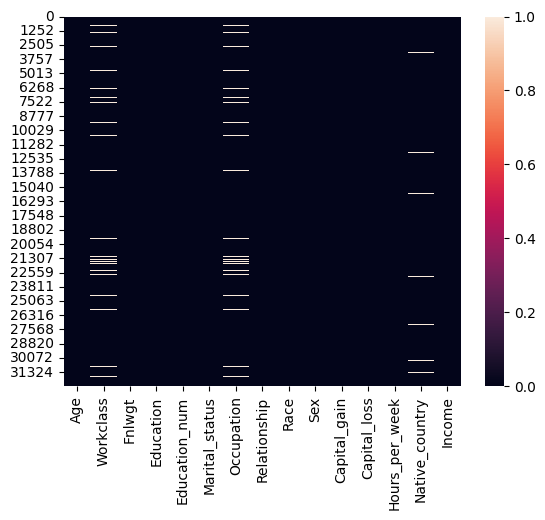

In [14]:
sns.heatmap(df.isnull())

##### There are missing values in Occupation , Workclass , Native_country

In [15]:
missingvalues=df.isnull().sum().sort_values(ascending=False)
percentage=(missingvalues/len(df))*100
print(pd.concat([missingvalues,percentage],axis=1,keys=['Missing values','Missing data']))

                Missing values  Missing data
Occupation                1843      5.664495
Workclass                 1836      5.642980
Native_country             582      1.788788
Fnlwgt                       0      0.000000
Education                    0      0.000000
Education_num                0      0.000000
Age                          0      0.000000
Marital_status               0      0.000000
Relationship                 0      0.000000
Sex                          0      0.000000
Race                         0      0.000000
Capital_gain                 0      0.000000
Capital_loss                 0      0.000000
Hours_per_week               0      0.000000
Income                       0      0.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [17]:
Numerical=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
Category=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [18]:
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

<b> Occupation, Workclass and Native Country are categorical variable so we can imputate them with mode of that feature.</b>

In [19]:
missingvalues=df.isnull().sum().sort_values(ascending=False)
percentage=(missingvalues/len(df))*100
print(pd.concat([missingvalues,percentage],axis=1,keys=['Missing values','Missing data']))

                Missing values  Missing data
Age                          0           0.0
Workclass                    0           0.0
Fnlwgt                       0           0.0
Education                    0           0.0
Education_num                0           0.0
Marital_status               0           0.0
Occupation                   0           0.0
Relationship                 0           0.0
Race                         0           0.0
Sex                          0           0.0
Capital_gain                 0           0.0
Capital_loss                 0           0.0
Hours_per_week               0           0.0
Native_country               0           0.0
Income                       0           0.0


#### Now there is no null values present in our dataset.

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


- The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
- The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
- While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
- The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [21]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("=========================================================")

Workclass
Workclass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
Education
Education
HS-grad         10494
Some-college     7282
Bachelors        5352
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64
Marital_status
Marital_status
Married-civ-spouse       14970
Never-married            10666
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
Occupation
Occupation
Prof-specialty       5979
Craft-repair         4094
E

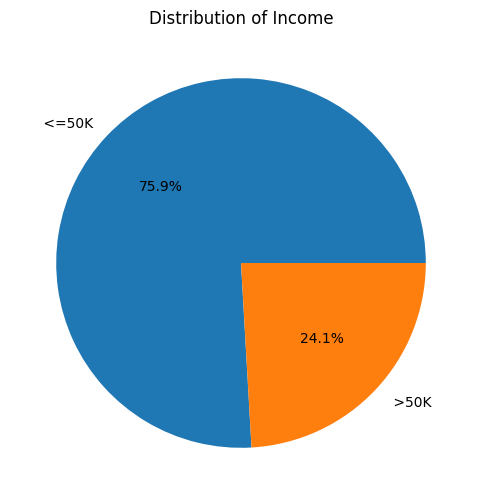

<Axes: xlabel='Income', ylabel='count'>

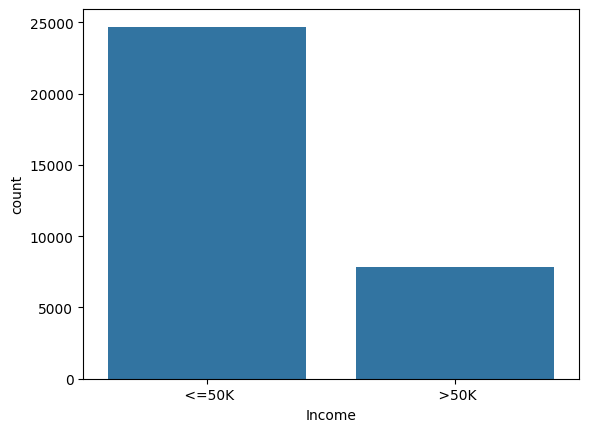

In [22]:
income_counts = df['Income'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Income')
plt.show()
sns.countplot(x=df['Income'])

In [23]:
print('Minimum Age:', df['Age'].min(),'years')
print('Maximum Age:', df['Age'].max(),'years')
print('Average Age:', df['Age'].mean(),'years')

Minimum Age: 17 years
Maximum Age: 90 years
Average Age: 38.58553602163757 years


In [24]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if (18 < x < 31):
        return "19-30"
    if (30 < x < 41) :
        return '31-40'
    if (40 < x <51):
        return '41-50'
    if (50 < x < 61):
        return "51-60"
    if (60 < x < 71):
        return "61-70"
    else :
        return 'Greater Than 70'

In [25]:
df['age_group']=df['Age'].apply(age_group)

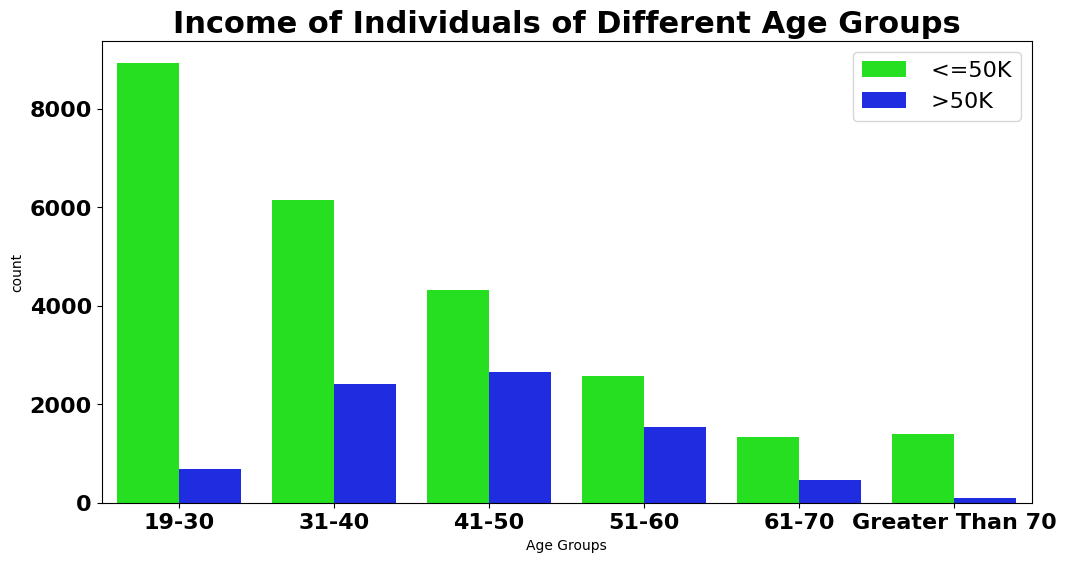

In [26]:
plt.figure(figsize=(12,6))
order_list = ['19-30','31-40','41-50','51-60','61-70','Greater Than 70']
p = sns.countplot(x=df['age_group'], hue=df['Income'], palette='hsv', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=22, fontweight='bold')
p.set_xlabel('Age Groups')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

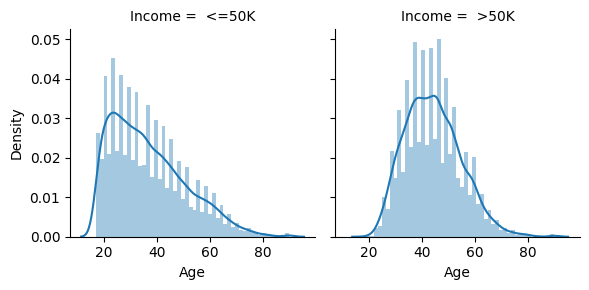

In [27]:
ax= sns.FacetGrid(df,col='Income')
ax.map(sns.distplot,'Age')
plt.show()

#### Observation:
<b> Here comes an interesting observation. We already know that only 24% people earnings more than 50K dollors and this plot tell us which age group then belong. </b>
- almost 10 % people in age group of 19-30 earns more than 50 K dollars and this count drop even more in old peoples having age greater than 70.<b> Might be some lucky old ones has created good Retirement Plan compare to rest old peoples.</b>
- We can find maximum people earning more than 50K dollors belong to age group 41-50 & 51-60. <u> It will be interesting to find out which profession lead this income to this category.</u>


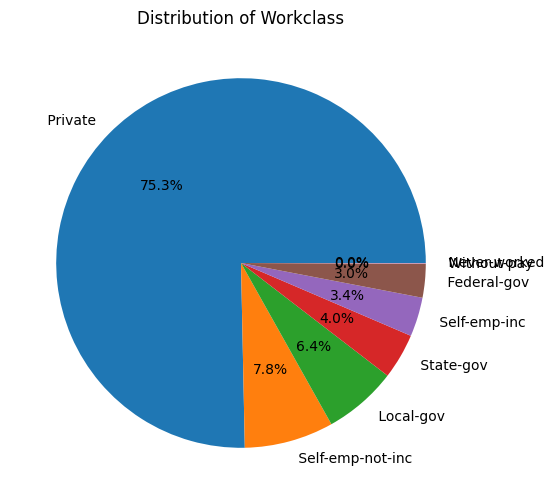

In [28]:
workclass_counts = df['Workclass'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(workclass_counts, labels=workclass_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Workclass')
plt.show()

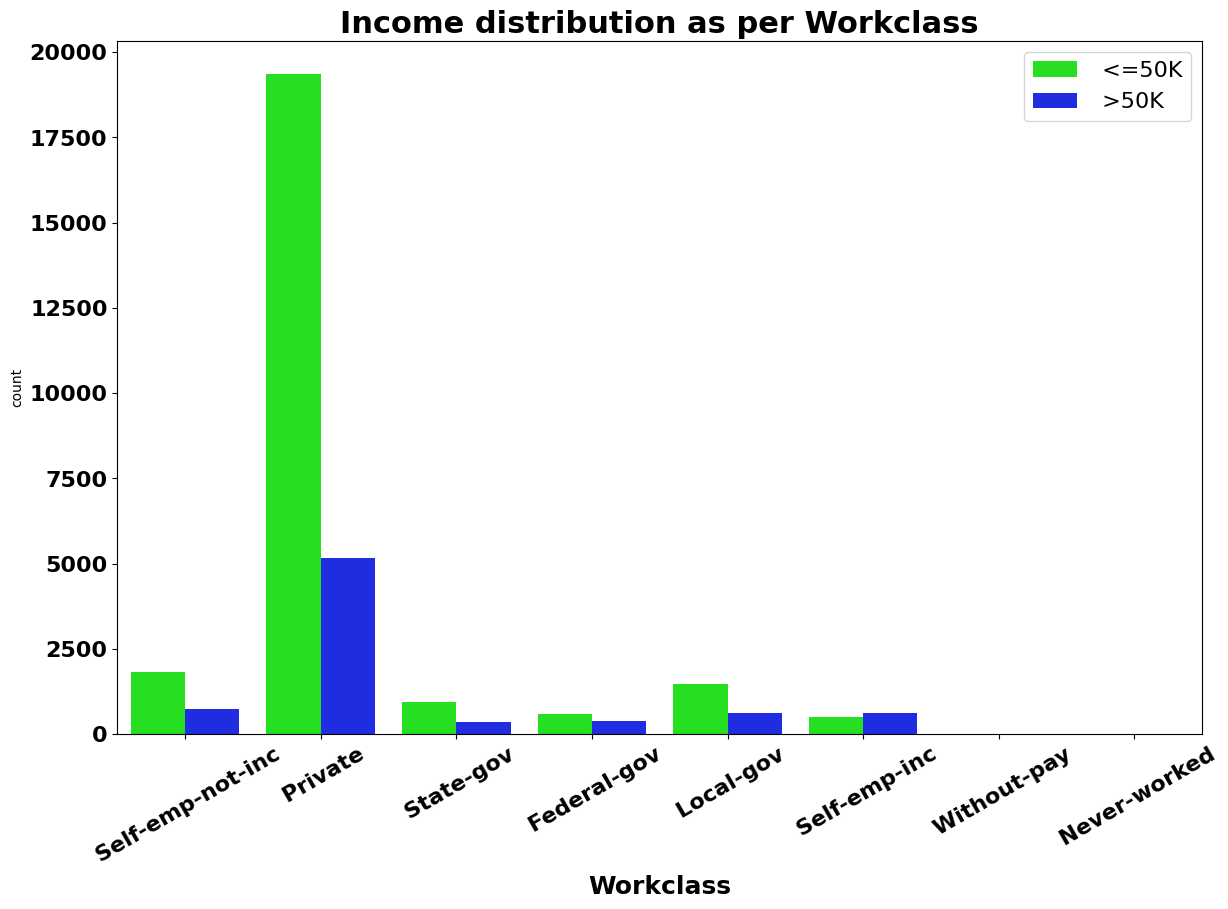

In [29]:
plt.figure(figsize=(14,9))
p = sns.countplot(x=df['Workclass'], hue=df['Income'], palette='hsv')
plt.title('Income distribution as per Workclass', fontsize=22, fontweight='bold')
p.set_xlabel('Workclass',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

In [30]:
pd.crosstab(df['Income'],df["Workclass"], margins=True)

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


#### Certainly Goverment Emplyoees have high wages compare to private !!!

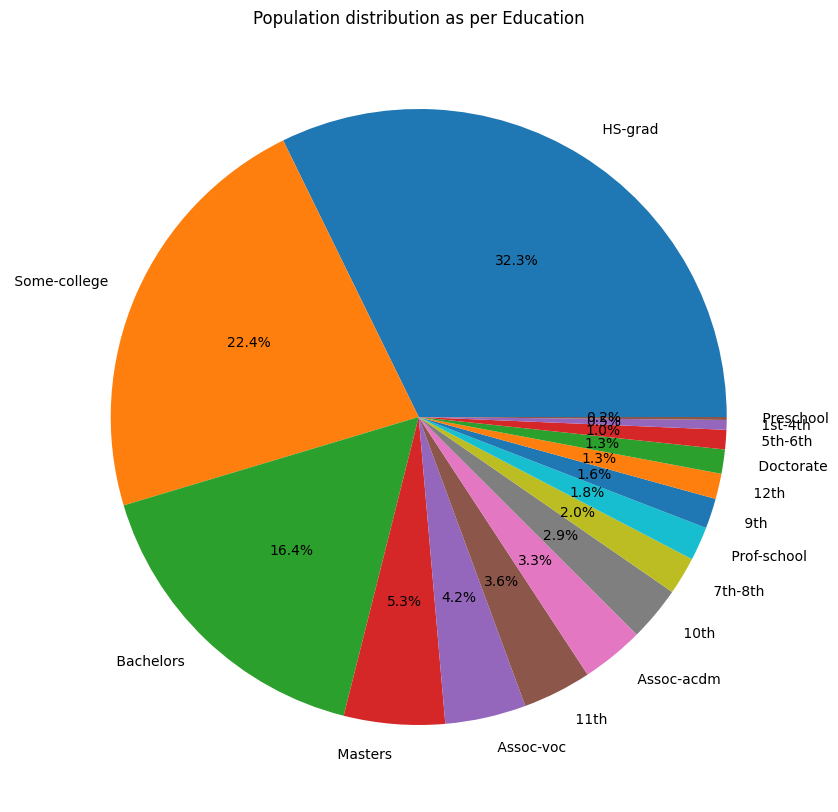

In [31]:
count=df['Education'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(count,labels=count.index,autopct='%1.1f%%')
plt.title('Population distribution as per Education')
plt.show()

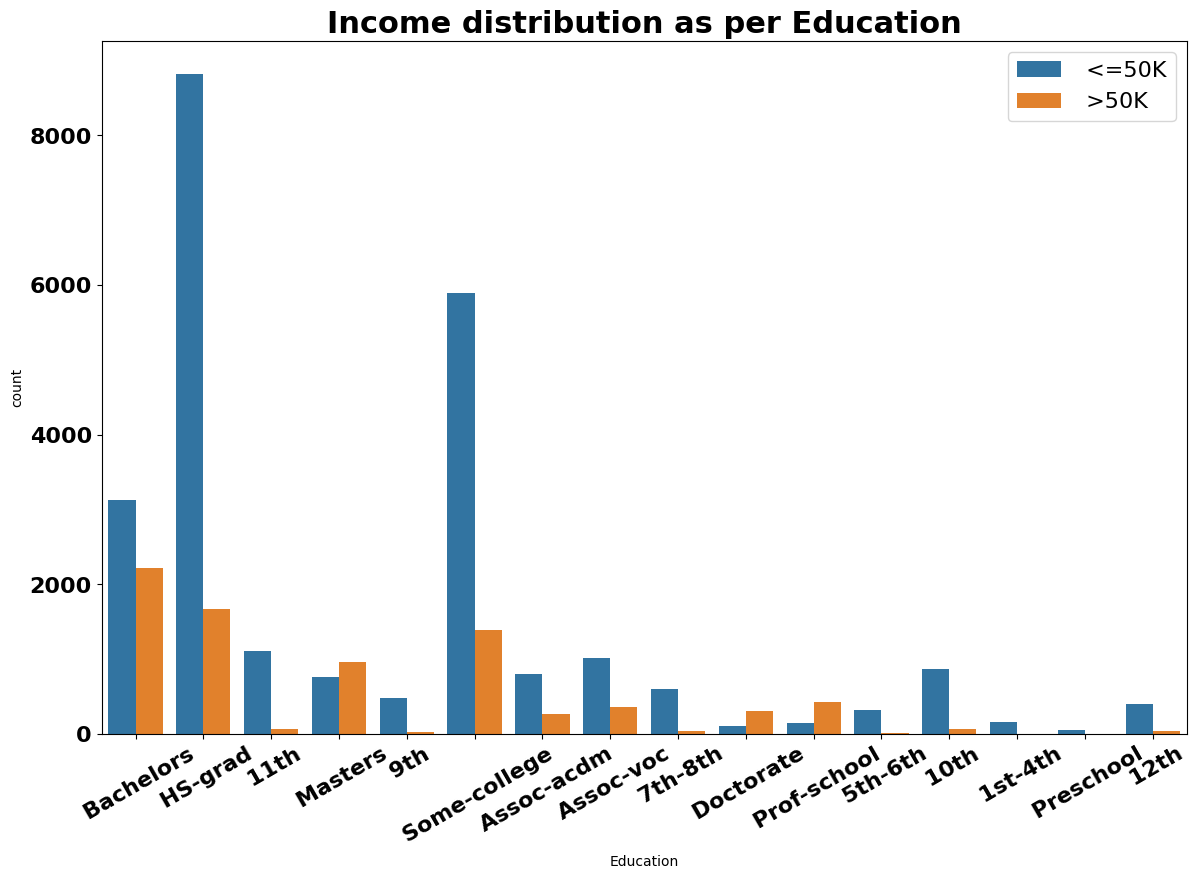

In [32]:
plt.figure(figsize=(14,9))
sns.countplot(x=df['Education'],hue=df['Income'])
plt.title('Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

- Out of all population 32.3% people with HS-Grad education which is most prevalent education level.
- 5.3 % people with masters and 1.3 % population is Doctorate degree holder. Highly educated & intellactual people belongs to this category.
- There are very handful people who earn more than 50 K dollars having education below 12th level.
- Maximum number of people who earn more than 50K dollars are Bachelors degree holder.
- <b> Here comes interesting observation about income of highly educated people. In case of people belonging to Masters, Doctorate and Prof-School category in the education level, the number people earning more than 50K dollars an year outnumber than the number of people earning less than it.</b>
- In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year!

In [33]:
pd.crosstab(df['Education'],df["Workclass"], margins=True)

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


In [34]:
table=pd.crosstab(df['Education'],df['Income'])

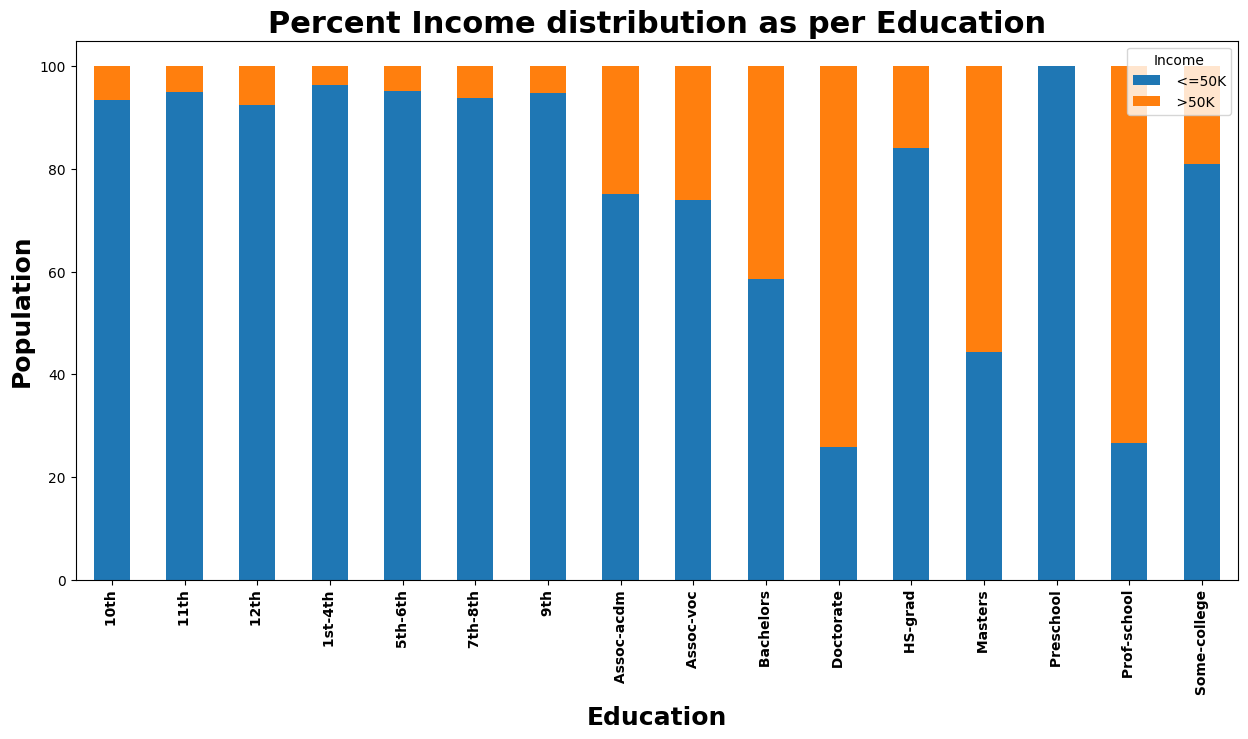

In [35]:
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,7))
plt.title('Percent Income distribution as per Education', fontsize=22, fontweight='bold')
plt.xlabel('Education', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

- In terms of percentage 75 % of Doctorate people earn more than 50K dollars an years, followed by Prof- school.
- <b> So, Highly earning people most of times comes with Masters or Doctorate education background.</b>
- From crosstab we can see that private sector is highest recuriter for HS-Grad with 8305 people.
- Private sector is also major recurtier of highly eduacated people with masters, doctorate followed by local goverment.

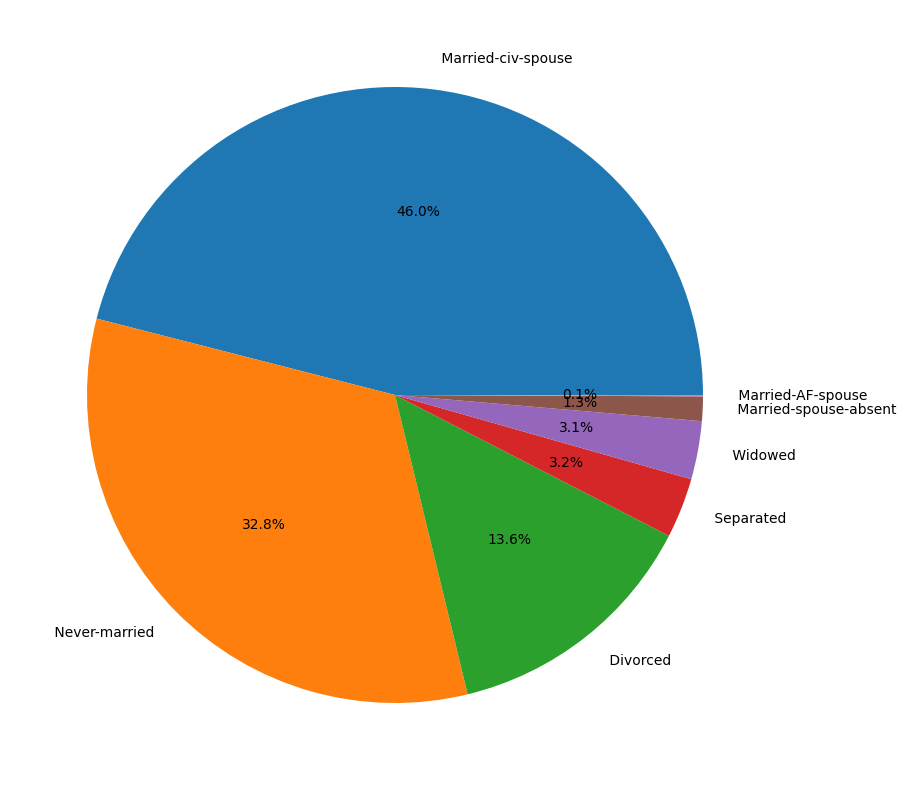

In [36]:
count=df['Marital_status'].value_counts()
plt.figure(figsize=(18,10))
plt.pie(count,labels=count.index,autopct='%1.1f%%')
plt.show()

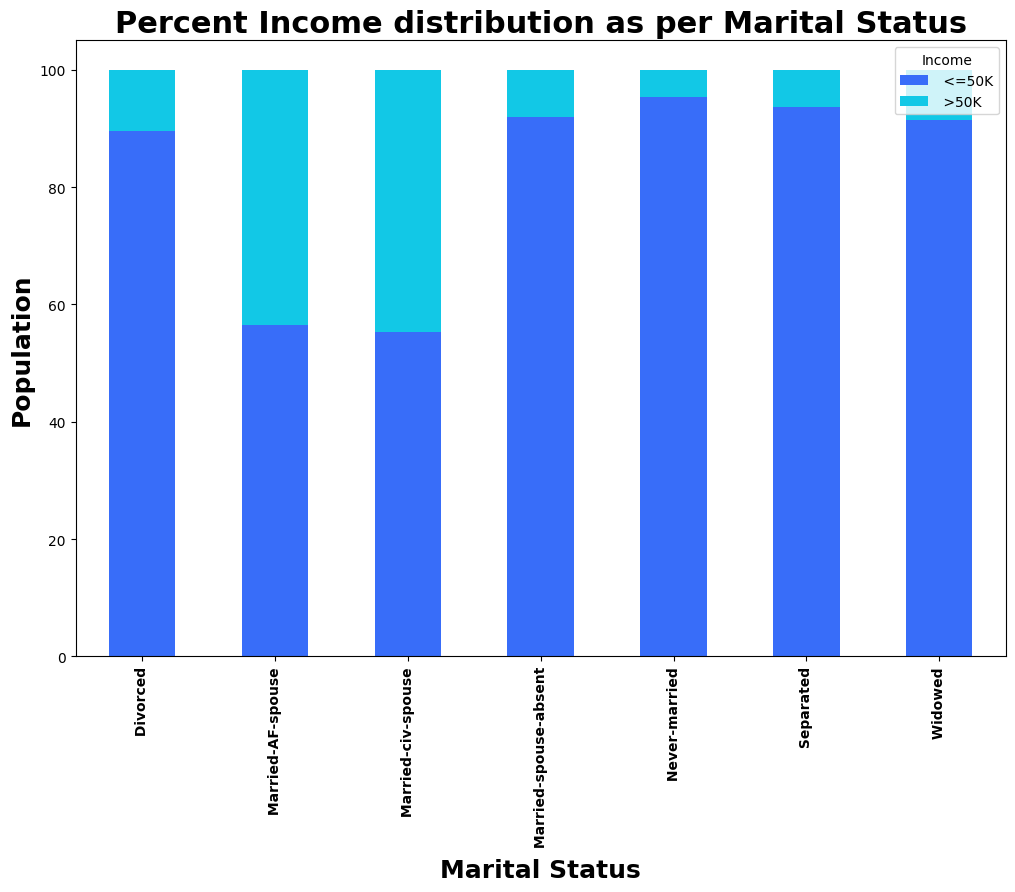

In [37]:
sns.set_palette('rainbow')
table = pd.crosstab(df['Marital_status'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Marital Status', fontsize=22, fontweight='bold')
plt.xlabel('Marital Status', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

In [38]:
pd.crosstab(df['Marital_status'],df["Income"], margins=True)

Income,<=50K,>50K,All
Marital_status,,,
Divorced,3978,463,4441
Married-AF-spouse,13,10,23
Married-civ-spouse,8280,6690,14970
Married-spouse-absent,384,34,418
Never-married,10175,491,10666
Separated,959,66,1025
Widowed,908,85,993
All,24697,7839,32536


- One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
- For others, there are less than 25% of the adults earning more than 50K dollars an year.

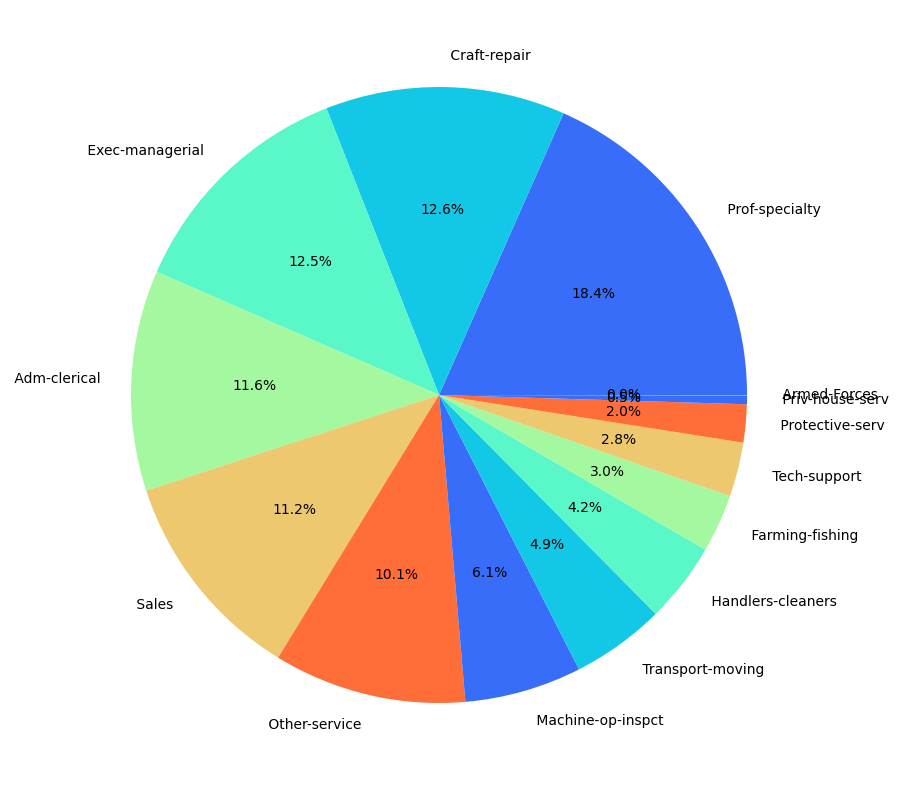

In [39]:
plt.figure(figsize=(15,10))
count=df['Occupation'].value_counts()
plt.pie(count,labels=count.index,autopct='%2.1f%%')
plt.show()

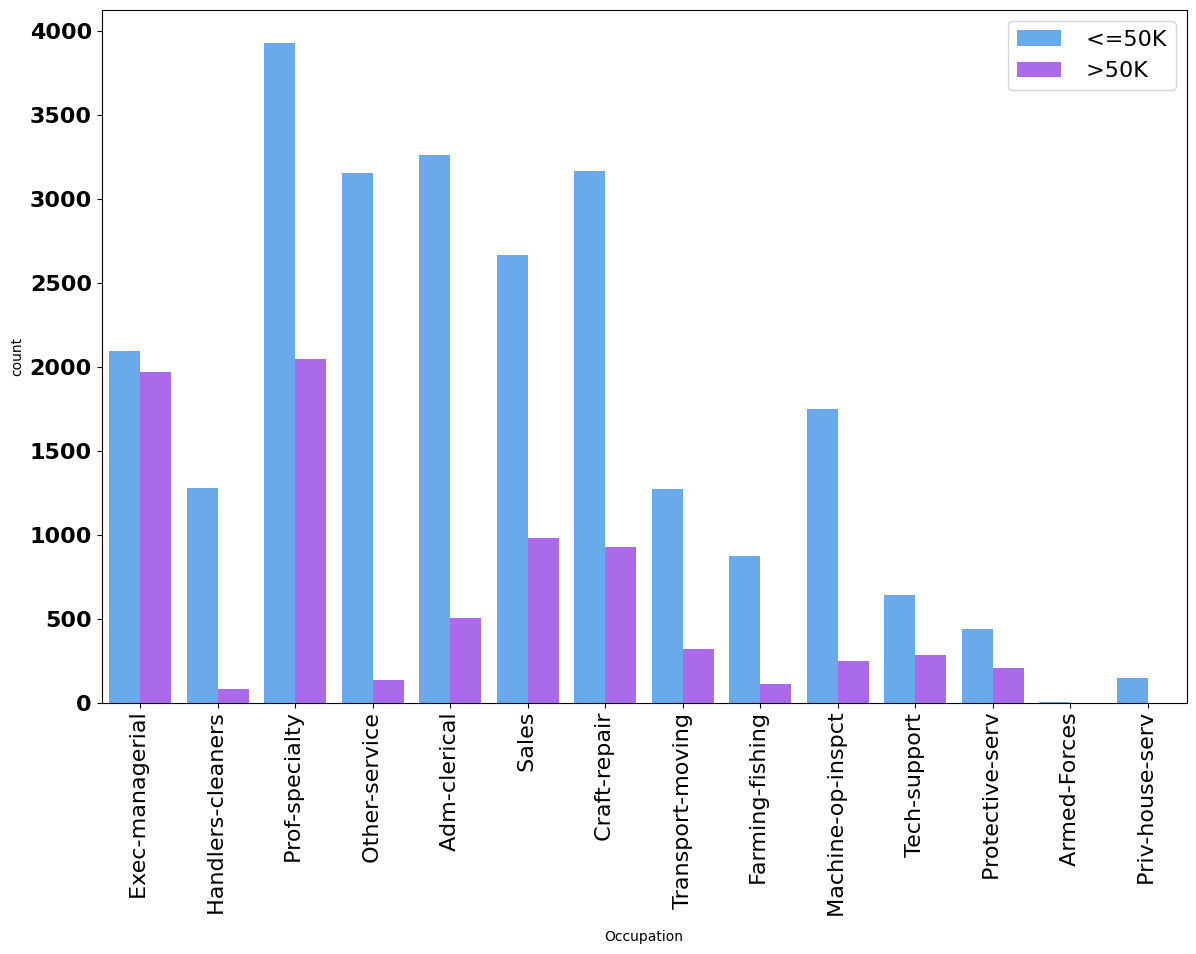

In [40]:
plt.figure(figsize=(14,9))
p = sns.countplot(x=df['Occupation'], hue=df['Income'], palette='cool')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=16)
plt.show()

- Exec-managerial role are equally likely to earn more than 50K dollars an year.
- Peoples working in Arm- Forces, Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Handlers-cleaners are very less likely to earn more than 50K dollars an year.
- Around 25% of the people working in Sales earn more than 50K dollars an year.

In [41]:
pd.crosstab(df['Occupation'],df["Income"], margins=True)

Income,<=50K,>50K,All
Occupation,,,
Adm-clerical,3260,507,3767
Armed-Forces,8,1,9
Craft-repair,3165,929,4094
Exec-managerial,2097,1968,4065
Farming-fishing,877,115,992
Handlers-cleaners,1283,86,1369
Machine-op-inspct,1751,249,2000
Other-service,3154,137,3291
Priv-house-serv,146,1,147


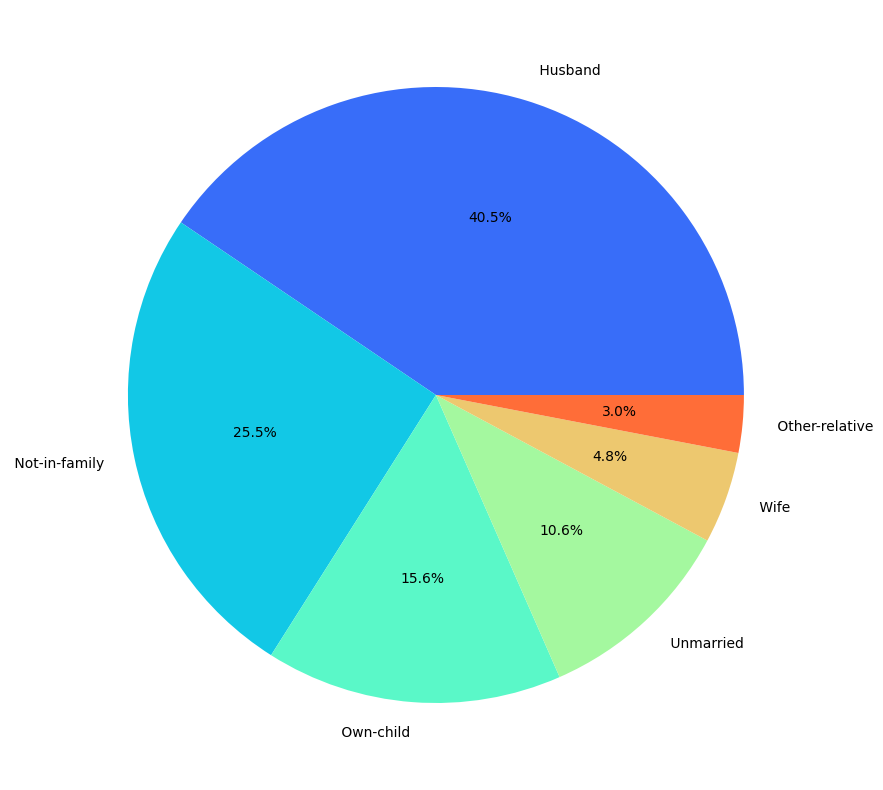

In [42]:
plt.figure(figsize=(15,10))
count=df['Relationship'].value_counts()
plt.pie(count,labels=count.index,autopct='%2.1f%%')
plt.show()

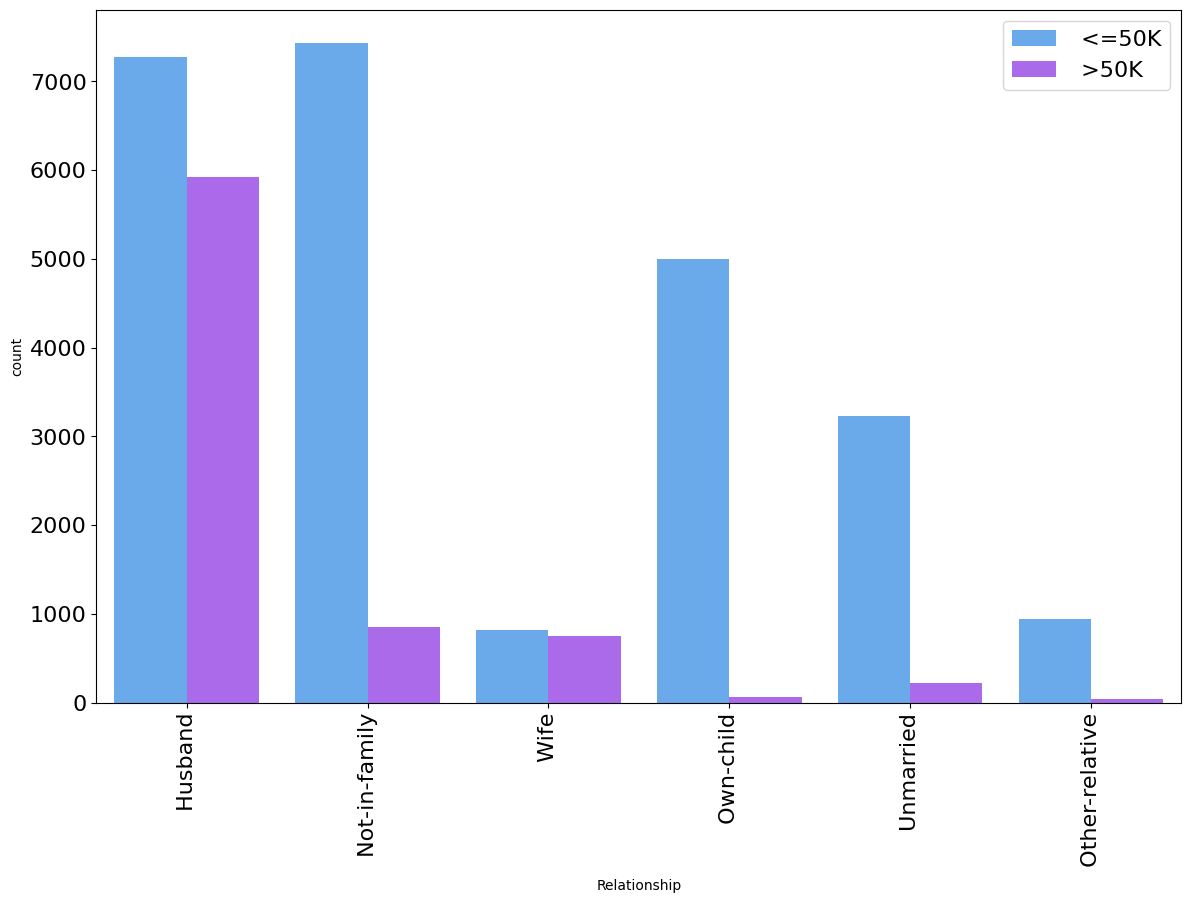

In [43]:
plt.figure(figsize=(14,9))
p = sns.countplot(x=df['Relationship'], hue=df['Income'], palette='cool')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

- Wives are equally likely to earn more than 50K dollars an year.
- For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.
- There are just a handful of Unmarried people earning more than 50K dollars an year.

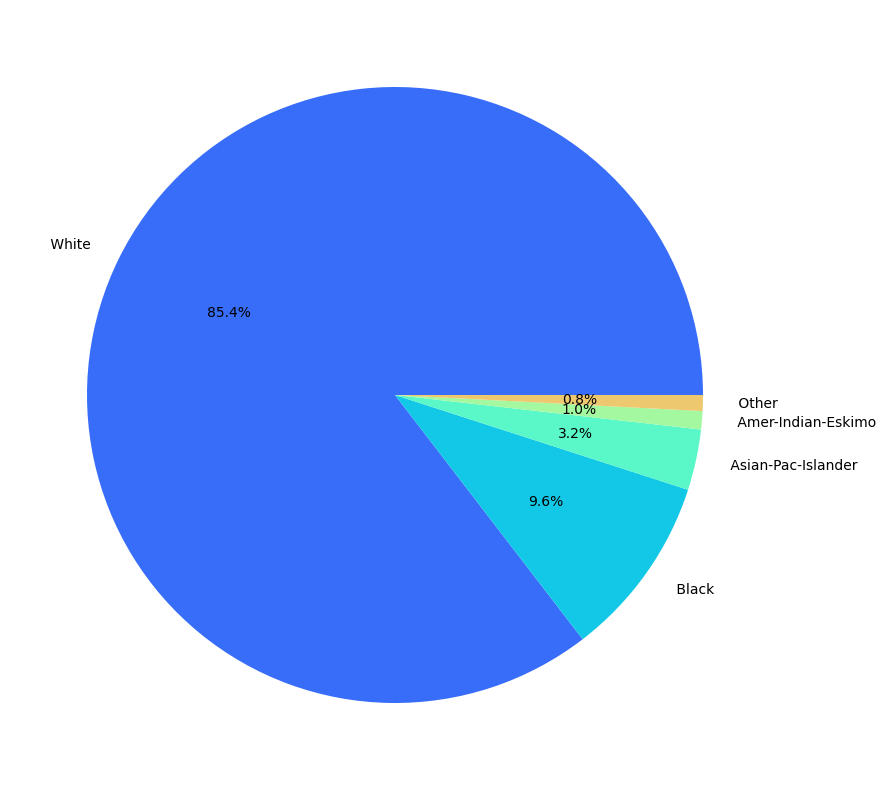

In [44]:
plt.figure(figsize=(15,10))
count=df['Race'].value_counts()
plt.pie(count,labels=count.index,autopct='%2.1f%%')
plt.show()

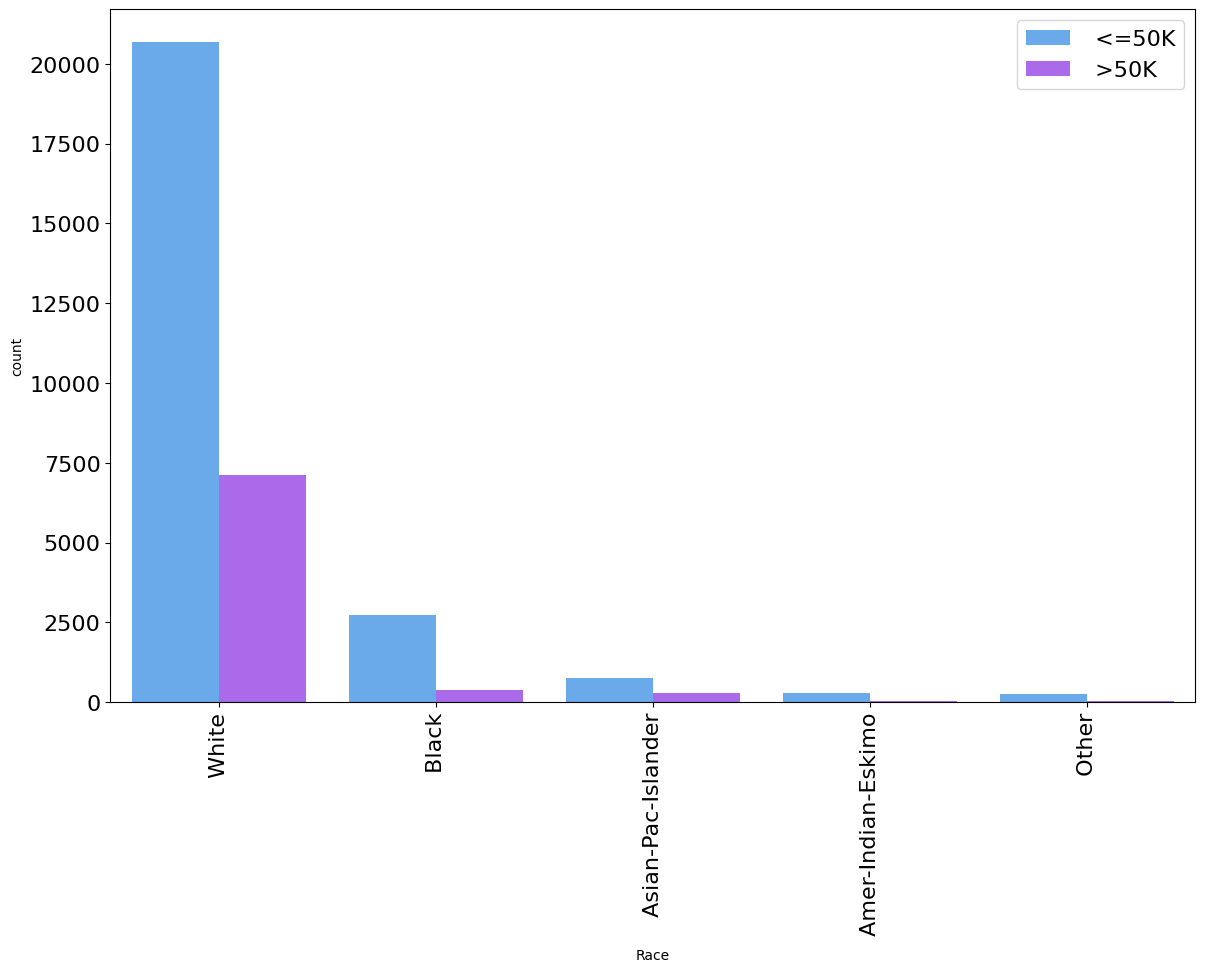

In [45]:
plt.figure(figsize=(14,9))
p = sns.countplot(x=df['Race'], hue=df['Income'], palette='cool')
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

- 85.4 % peoples are whites followed by black community with 9.6%.
- Maximum peoples in Greater than 50K Club are White.

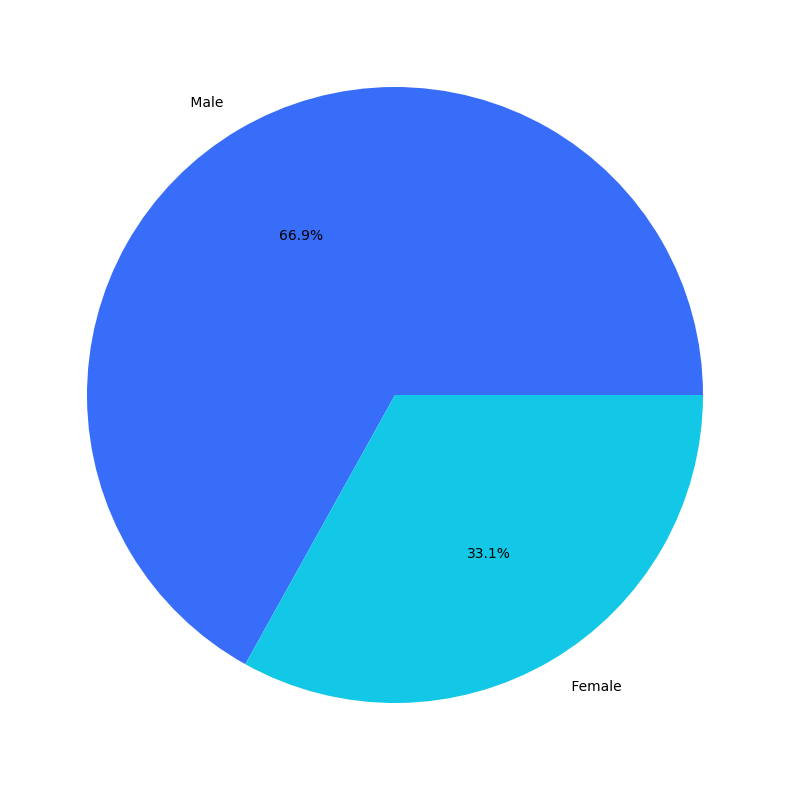

In [46]:
plt.figure(figsize=(15,10))
count=df['Sex'].value_counts()
plt.pie(count,labels=count.index,autopct='%2.1f%%')
plt.show()

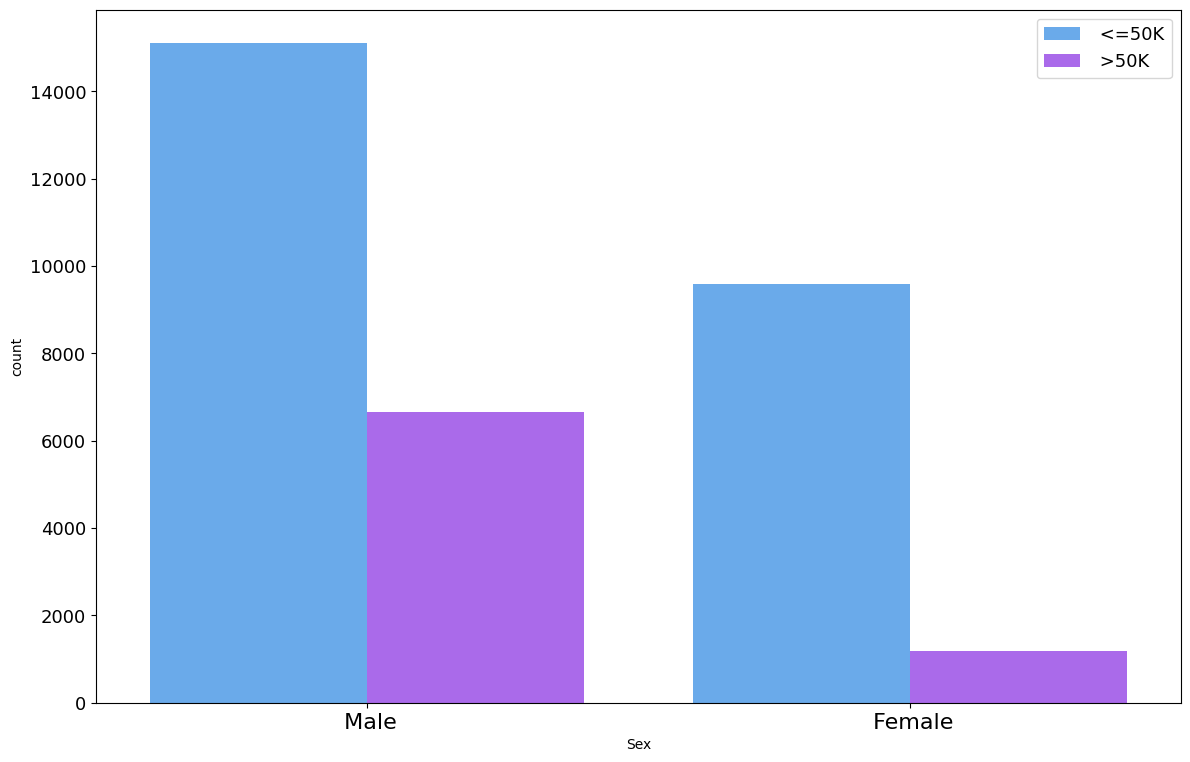

In [47]:
plt.figure(figsize=(14,9))
p = sns.countplot(x=df['Sex'], hue=df['Income'], palette='cool')
plt.xticks(fontsize=16)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.show()

- Significant gap between male and female earnings.
- Less than 10% Women in Greater Than 50K Dollar Club.
- Around 33% of Men earning more than 50K dollars an year.

In [48]:
pd.crosstab(df.Occupation,[df.Sex,df.Income], margins=True)

Sex                 Female         Male          All
Income               <=50K  >50K  <=50K  >50K       
Occupation                                          
 Adm-clerical         2323   212    937   295   3767
 Armed-Forces            0     0      8     1      9
 Craft-repair          202    20   2963   909   4094
 Exec-managerial       879   280   1218  1688   4065
 Farming-fishing        63     2    814   113    992
 Handlers-cleaners     160     4   1123    82   1369
 Machine-op-inspct     529    20   1222   229   2000
 Other-service        1748    51   1406    86   3291
 Priv-house-serv       138     1      8     0    147
 Prof-specialty       1917   437   2013  1612   5979
 Protective-serv        66    10    372   201    649
 Sales                1175    88   1492   895   3650
 Tech-support          302    45    342   238    927
 Transport-moving       81     9   1196   311   1597
All                   9583  1179  15114  6660  32536

- Out of all population 33 % are womens. Inside that most of females work in Adm-clerical,Other-service,Prof-specialty.
- Same as in case of Men Maximum number in Greater than 50K dollars Club in females comes from Prof-speciality,Exec-Managerial profession.
- Maximum men work in Prof-Specialty.

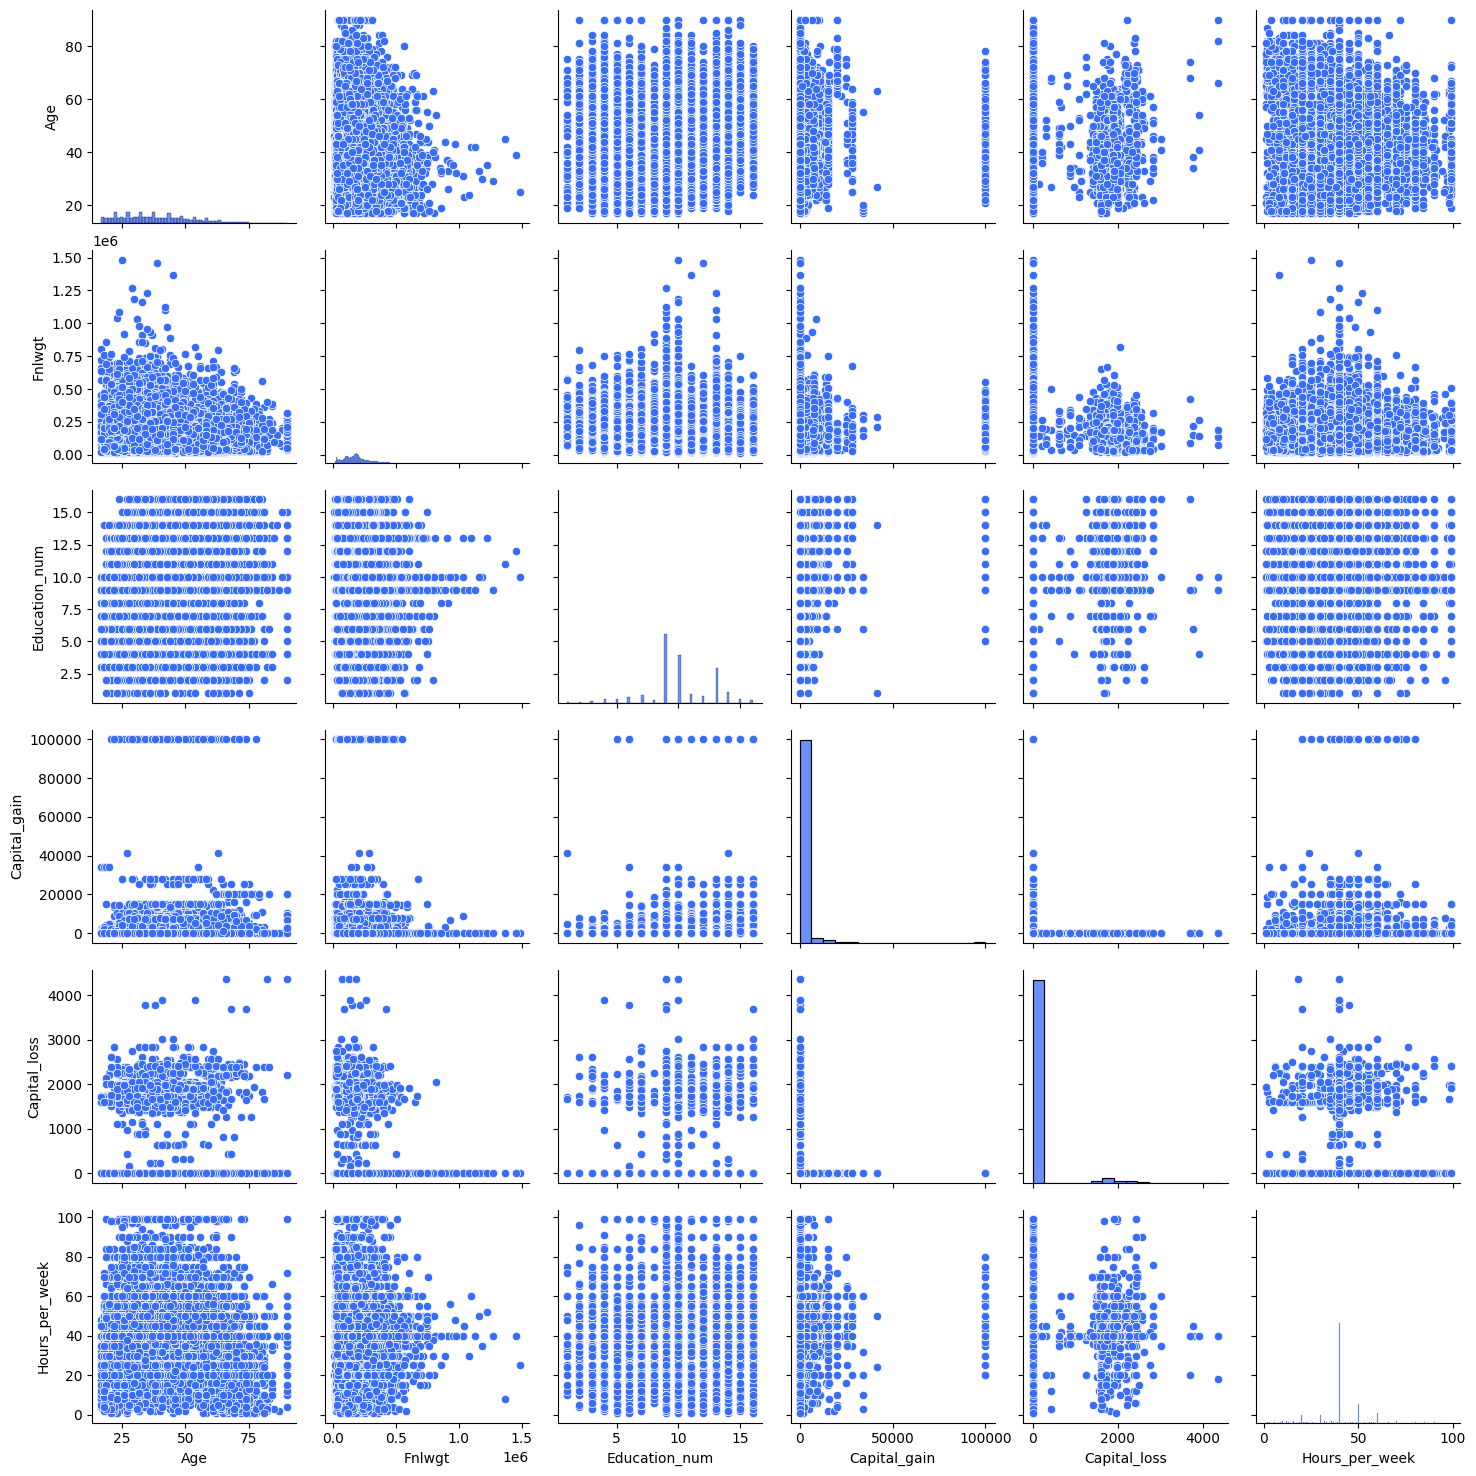

In [49]:
sns.pairplot(df)

# Encoding categorical data

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in Category:
    df[i]= le.fit_transform(df[i])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income,age_group
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,41-50
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,31-40
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,51-60
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,19-30
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0,31-40


# Feature selection and Engineering

## Outliers Detection and Removal

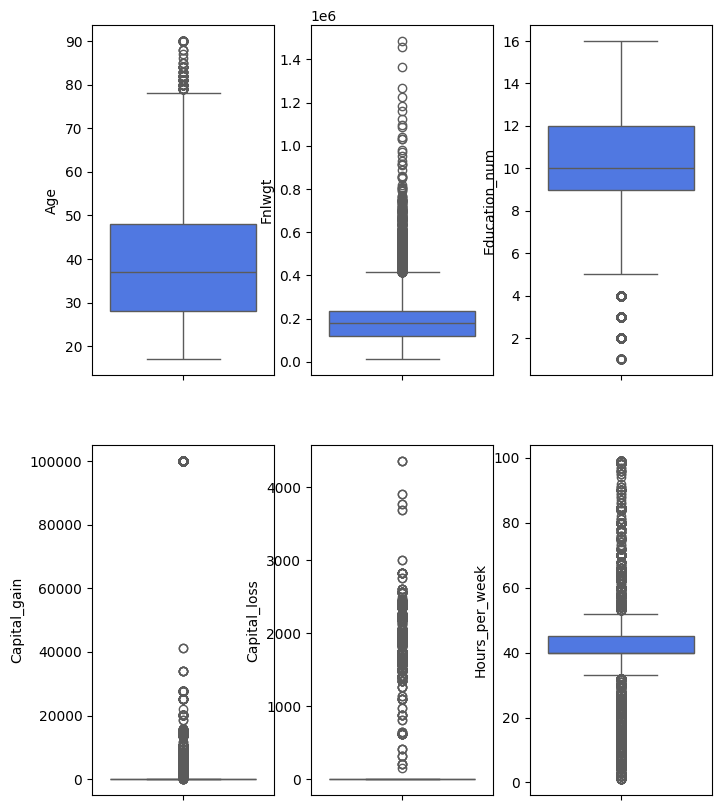

In [56]:
plt.figure(figsize=(8,10))
plotnumber=1
for i in Numerical:
    if plotnumber<=6:
        plt.subplot(2,3,plotnumber)
        sns.boxplot(df[i])
    plotnumber+=1
plt.show()

In [57]:
df.drop(['Fnlwgt','Education'],axis=1,inplace=True)

In [64]:
from scipy.stats import zscore
numerical_cols = df.select_dtypes(include=[np.number])
z = np.abs(zscore(numerical_cols))
df1 = df[(z < 3).all(axis=1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100,"%")


Shape of the dataframe before removing outliers:  (32536, 14)
Shape of the dataframe after removing outliers:  (28061, 14)
Percentage of data loss post outlier removal:  13.753995574133269 %


In [65]:
df=df1.copy()

## Skewness

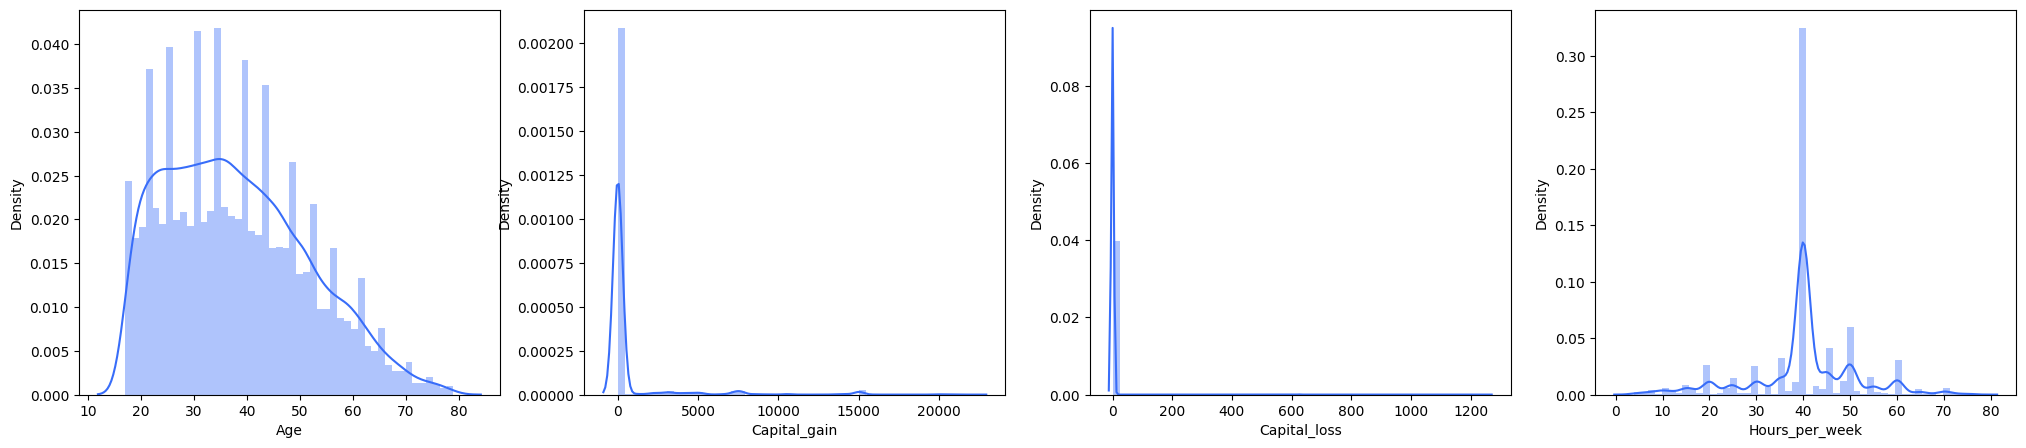

In [69]:
plt.figure(figsize=(25,5))
plotnumber=1
for i in df[['Age','Capital_gain','Capital_loss','Hours_per_week']]:
    if plotnumber<=4:
        plt.subplot(1,4,plotnumber)
        sns.distplot(df[i])
    plotnumber+=1
plt.show()     


In [73]:
df.skew()

Age                0.487918
Workclass          0.080746
Education_num     -0.147601
Marital_status    -0.046623
Occupation         0.015247
Relationship       0.752334
Race              -2.549199
Sex               -0.689977
Capital_gain       4.924729
Capital_loss      29.669292
Hours_per_week    -0.359365
Native_country    -5.348195
Income             1.322011
dtype: float64

- Relationship,Sex,Native_country,Income are skewed but as they are categorical concept of skewness doesnot mean anything to it.
- Capital_gain and Capital_loss are numeric variable with lot of zero and high number. So skewness exist in them. There is no point in transforming it because at end data will be skewed.

## Correlation

In [75]:
df.corr()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.029674,0.045622,-0.286328,-0.001610,-0.270591,0.021292,0.089469,0.131998,0.023459,0.090783,0.037494,0.241844
Workclass,0.029674,1.000000,-0.002200,-0.015623,0.008779,-0.057823,0.067532,0.069617,0.011083,-0.010613,0.028104,0.001938,-0.007699
Education_num,0.045622,-0.002200,1.000000,-0.058587,0.073142,-0.092447,0.080766,0.003688,0.157858,0.007348,0.156303,0.149688,0.320271
Marital_status,-0.286328,-0.015623,-0.058587,1.000000,0.036477,0.183248,-0.084558,-0.125361,-0.069601,-0.016396,-0.196053,-0.032575,-0.194146
Occupation,-0.001610,0.008779,0.073142,0.036477,1.000000,-0.038735,0.000613,0.051055,0.009446,-0.004779,-0.022194,0.018069,0.030664
Relationship,-0.270591,-0.057823,-0.092447,0.183248,-0.038735,1.000000,-0.146432,-0.577195,-0.089095,0.030105,-0.261919,-0.011274,-0.248263
Race,0.021292,0.067532,0.080766,-0.084558,0.000613,-0.146432,1.000000,0.122731,0.031333,0.000186,0.055486,0.018660,0.094756
Sex,0.089469,0.069617,0.003688,-0.125361,0.051055,-0.577195,0.122731,1.000000,0.069539,-0.027323,0.236168,-0.011189,0.211792
Capital_gain,0.131998,0.011083,0.157858,-0.069601,0.009446,-0.089095,0.031333,0.069539,1.000000,-0.009077,0.098705,0.019185,0.343487
Capital_loss,0.023459,-0.010613,0.007348,-0.016396,-0.004779,0.030105,0.000186,-0.027323,-0.009077,1.000000,-0.003440,0.002925,-0.016465


<Axes: >

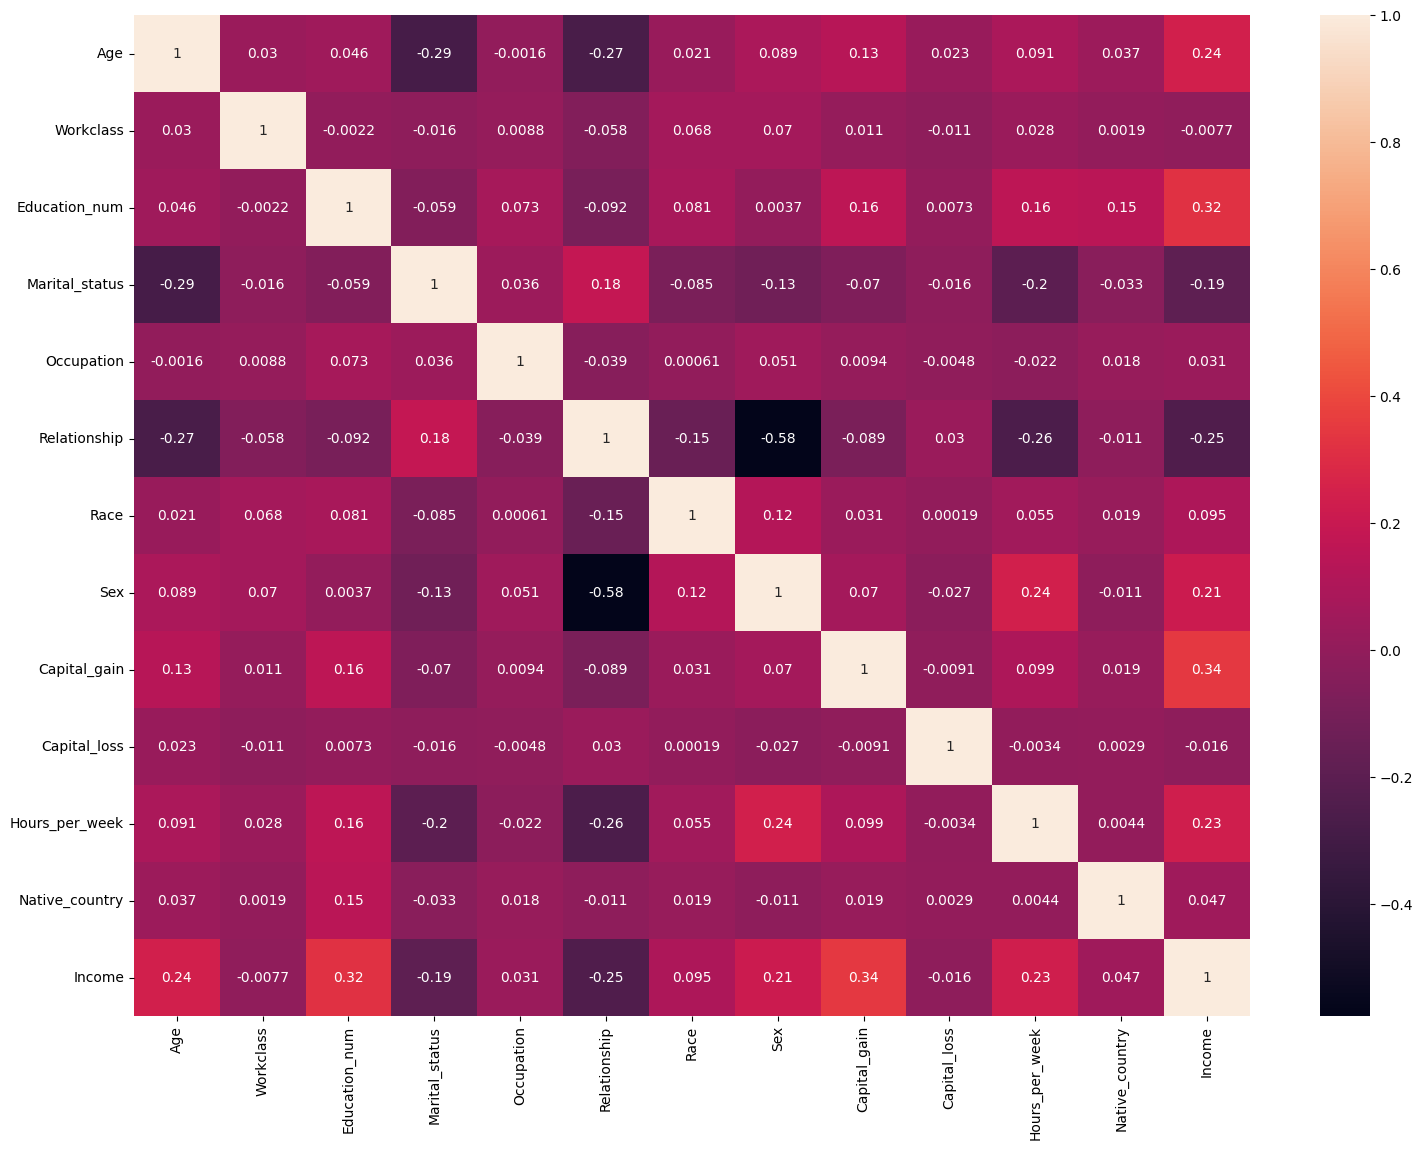

In [77]:
plt.figure(figsize=(18,13))
sns.heatmap(df.corr(),annot=True)

- Capital loss and workclass,occupation, native country, race are correlated with target variable with less than 10% correlation.  After checking Mulitcollinearity we will decide to drop these poorly correlated features or go for PCA. 
    
    As high or low Correlation doesnot mean its causation !!!
- Between input features maximum correlation of -0.557 exist between sex and relationship.
- Capital gain is highly correlated with target variable.


## Multicollinearity between features using VIF

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
vif=pd.DataFrame()

In [80]:
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']=df.columns
vif

,VIF,Features
0,10.452897,Age
1,8.807425,Workclass
2,21.287850,Education_num
3,4.358505,Marital_status
4,3.357557,Occupation
5,2.937270,Relationship
6,36.291318,Race
7,4.566872,Sex
8,1.209589,Capital_gain
9,1.004295,Capital_loss


1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.

## Balanceing Imbalanced target feature


In [81]:
df.Income.value_counts()

Income
0    21767
1     6294
Name: count, dtype: int64

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
X=df.drop(['Income'],axis=1)
Y=df['Income']

In [84]:
ov=SMOTE()
X,Y=ov.fit_resample(X,Y)

In [87]:
Y.value_counts()

Income
0    21767
1    21767
Name: count, dtype: int64

We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

## Standard Scaling

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler=StandardScaler()

In [91]:
X_scale=scaler.fit_transform(X)

In [92]:
from sklearn.decomposition import PCA

In [93]:
pca=PCA()
x_pca=pca.fit_transform(X_scale)

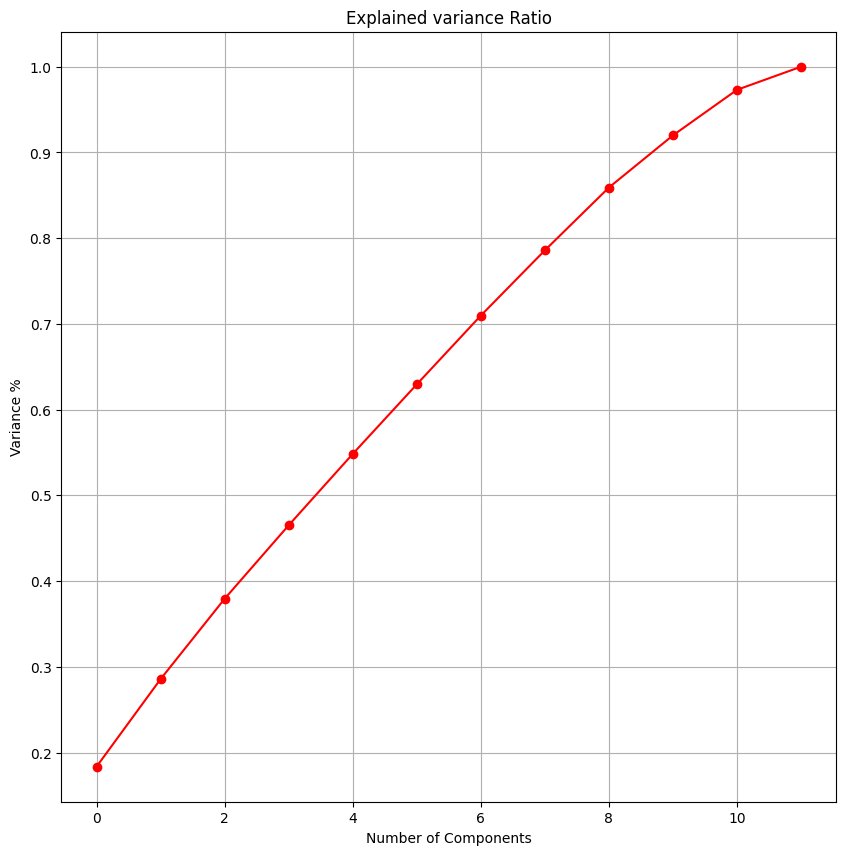

In [94]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

##### AS per the graph, we can see that 9 principal components attribute for 90% of variation in the data.  We shall pick the first 9 components for our prediction.

In [95]:
pca_new = PCA(n_components=9)
x_new = pca_new.fit_transform(X_scale)

In [96]:
principle_x=pd.DataFrame(x_new,columns=np.arange(9))

# Machine Learning Models

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (30473, 9)
Training target vector size: (30473,)
Test feature matrix size: (13061, 9)
Test target vector size: (13061,)


#### Finding Random State

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [103]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)       

Best accuracy is 0.7726820304723987 on Random_state 120


In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=28, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7701554245463594


Confusion matrix of Logistics Regression : 
 [[5019 1546]
 [1456 5040]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      6565
           1       0.77      0.78      0.77      6496

    accuracy                           0.77     13061
   macro avg       0.77      0.77      0.77     13061
weighted avg       0.77      0.77      0.77     13061



### Finding Optimal value of n_neighbors for KNN

In [105]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(12):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.40335853638388053
RMSE value for k=  2 is: 0.42191334662684415
RMSE value for k=  3 is: 0.3886649056073588
RMSE value for k=  4 is: 0.3987769372827347
RMSE value for k=  5 is: 0.39443335811169894
RMSE value for k=  6 is: 0.40155123754120736
RMSE value for k=  7 is: 0.39578980205967906
RMSE value for k=  8 is: 0.3986809274252501
RMSE value for k=  9 is: 0.3993525117039351
RMSE value for k=  10 is: 0.40174186239767984
RMSE value for k=  11 is: 0.4012651304599658
RMSE value for k=  12 is: 0.40373798946533207


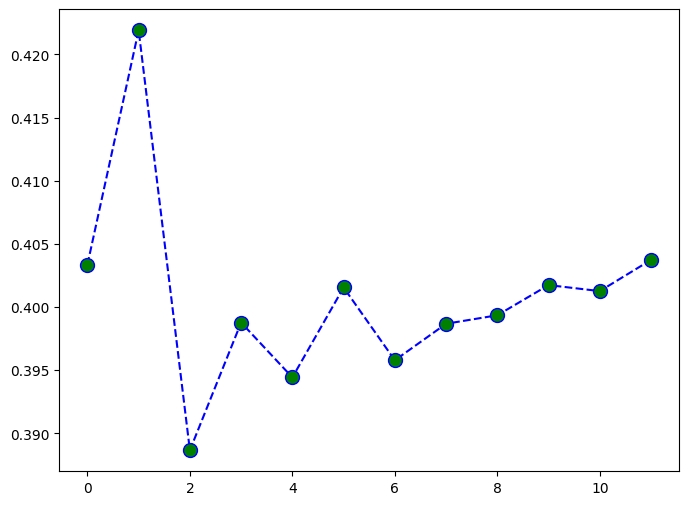

In [106]:
plt.figure(figsize = (8,6))
plt.plot(range(12), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

#### Comment- 
At k=3, we get the minimum RMSE value which approximately 0.3925849735896683, and shoots up on further increasing the k value. We can safely say that k=3 will give us the best result in this case


In [107]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7701554245463594


Confusion matrix : 
 [[5019 1546]
 [1456 5040]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      6565
           1       0.77      0.78      0.77      6496

    accuracy                           0.77     13061
   macro avg       0.77      0.77      0.77     13061
weighted avg       0.77      0.77      0.77     13061



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8278845417655616


Confusion matrix : 
 [[4955 1610]
 [ 638 5858]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.75      0.82      6565
           1       0.78      0.90      0.84      6496

    accuracy                           0.83     13061
   macro avg       0.84      0.83      0.83     13061
weighted avg       0.84      0.83      0

# Hyper Parameter Tuning : GridSearchCV

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]
             }

In [110]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 1/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.848 total time=   1.4s
[CV 2/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 2/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.852 total time=   1.5s
[CV 3/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 3/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.847 total time=   1.5s
[CV 4/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 4/5; 1/54] END criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100;, score=0.855 total time=   1.6s
[CV 5/5; 1/54] START criterion=gini, max_depth=20, min_samples_split=3, n_estimators=100
[CV 5/5; 1/54

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]},
             verbose=10)

In [111]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_split': 5,
 'n_estimators': 150}

# Final Model

In [112]:
Final_mod = ExtraTreesClassifier(criterion='entropy',n_estimators= 200, max_depth=30 ,min_samples_split= 8)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8638695352576372


<Figure size 1000x1000 with 0 Axes>

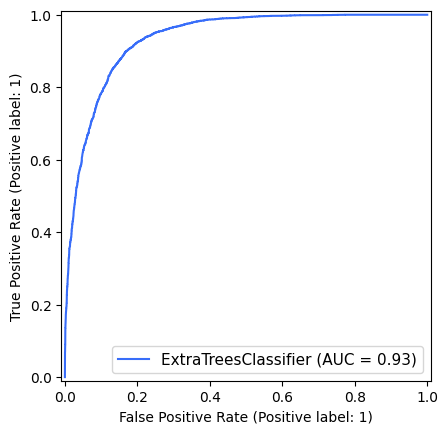

AUC Score :
 0.9347852237383647


In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
plt.figure(figsize=(10, 10)) 
RocCurveDisplay.from_estimator(Final_mod, X_test, Y_test) 
plt.legend(prop={'size':11}, loc='lower right')  
plt.show() 
auc_score = roc_auc_score(Y_test, Final_mod.predict_proba(X_test)[:, 1])
print('\033[1m'+'AUC Score :'+'\033[0m\n', auc_score)


In [116]:
import joblib
joblib.dump(Final_mod,'Census_Income_Final.pkl')

['Census_Income_Final.pkl']